In [40]:
# Import necessary libraries
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from plotly.offline import init_notebook_mode, iplot

# Initialize Plotly in notebook mode
init_notebook_mode(connected=True)

In [ ]:
# Define paths
DATA_DIR = "C:/Users/hruth/Music/Projects/nasa_battery_analysis/data/cleaned_dataset"
METADATA_FILE = "C:/Users/hruth/Music/Projects/nasa_battery_analysis/data/metadata.csv"

In [25]:
# Step 1: Load metadata
metadata = pd.read_csv(METADATA_FILE)
print("Metadata Columns:")
print(metadata.columns)
metadata.head()

Metadata Columns:
Index(['type', 'start_time', 'ambient_temperature', 'battery_id', 'test_id',
       'uid', 'filename', 'Capacity', 'Re', 'Rct'],
      dtype='object')


,type,start_time,ambient_temperature,battery_id,test_id,uid,filename,Capacity,Re,Rct
0,discharge,[2010. 7. 21. 15. 0. ...,4,B0047,0,1,00001.csv,1.6743047446975208,NaN,NaN
1,impedance,[2010. 7. 21. 16. 53. ...,24,B0047,1,2,00002.csv,NaN,0.05605783343888099,0.20097016584458333
2,charge,[2010. 7. 21. 17. 25. ...,4,B0047,2,3,00003.csv,NaN,NaN,NaN
3,impedance,[2010 7 21 20 31 5],24,B0047,3,4,00004.csv,NaN,0.05319185850921101,0.16473399914864734
4,discharge,[2.0100e+03 7.0000e+00 2.1000e+01 2.1000e+01 2...,4,B0047,4,5,00005.csv,1.5243662105099023,NaN,NaN


In [26]:
# Step 2: Inspect metadata statistics
metadata.describe()

,ambient_temperature,test_id,uid
count,7565.000000,7565.000000,7565.000000
mean,20.017713,176.012558,3783.000000
std,11.082914,152.174147,2183.971726
min,4.000000,0.000000,1.000000
25%,4.000000,55.000000,1892.000000
50%,24.000000,129.000000,3783.000000
75%,24.000000,255.000000,5674.000000
max,44.000000,615.000000,7565.000000


In [ ]:
# Step 3: Load and explore a sample CSV file
sample_file = os.path.join(DATA_DIR, os.listdir(DATA_DIR)[0])
sample_data = pd.read_csv(sample_file)

In [28]:
print("Sample CSV File Columns:")
print(sample_data.columns)
sample_data.head()

Sample CSV File Columns:
Index(['Voltage_measured', 'Current_measured', 'Temperature_measured',
       'Current_load', 'Voltage_load', 'Time'],
      dtype='object')


,Voltage_measured,Current_measured,Temperature_measured,Current_load,Voltage_load,Time
0,4.246711,0.000252,6.212696,0.0002,0.000,0.000
1,4.246764,-0.001411,6.234019,0.0002,4.262,9.360
2,4.039277,-0.995093,6.250255,1.0000,3.465,23.281
3,4.019506,-0.996731,6.302176,1.0000,3.451,36.406
4,4.004763,-0.992845,6.361645,1.0000,3.438,49.625


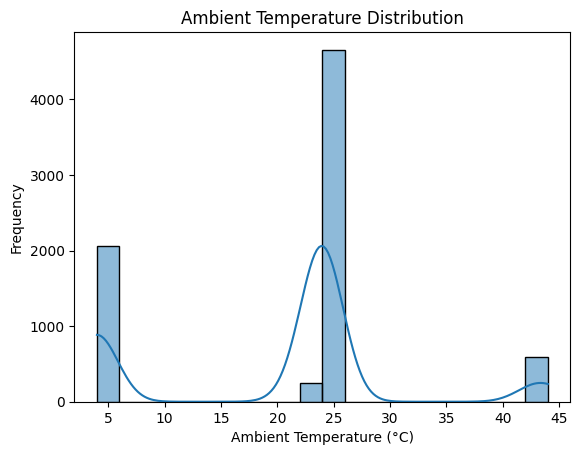

In [29]:
# Step 4: Analyze metadata attributes
sns.histplot(metadata["ambient_temperature"], bins=20, kde=True)
plt.title("Ambient Temperature Distribution")
plt.xlabel("Ambient Temperature (°C)")
plt.ylabel("Frequency")
plt.show() # Plot the distribution of ambient temperatures

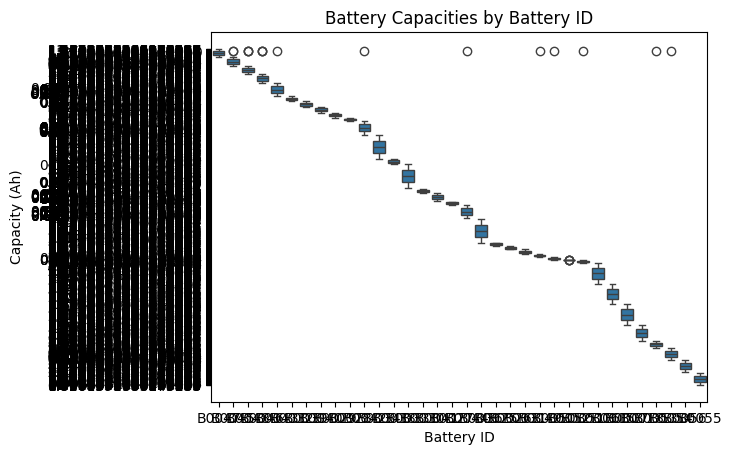

In [30]:
sns.boxplot(x="battery_id", y="Capacity", data=metadata)
plt.title("Battery Capacities by Battery ID")
plt.xlabel("Battery ID")
plt.ylabel("Capacity (Ah)")
plt.show() # Plot battery capacities

In [ ]:
sample_data['Time'] = pd.to_numeric(sample_data['Time'], errors='coerce')
sample_data['Voltage_measured'] = pd.to_numeric(sample_data['Voltage_measured'], errors='coerce') # Plot voltage over time

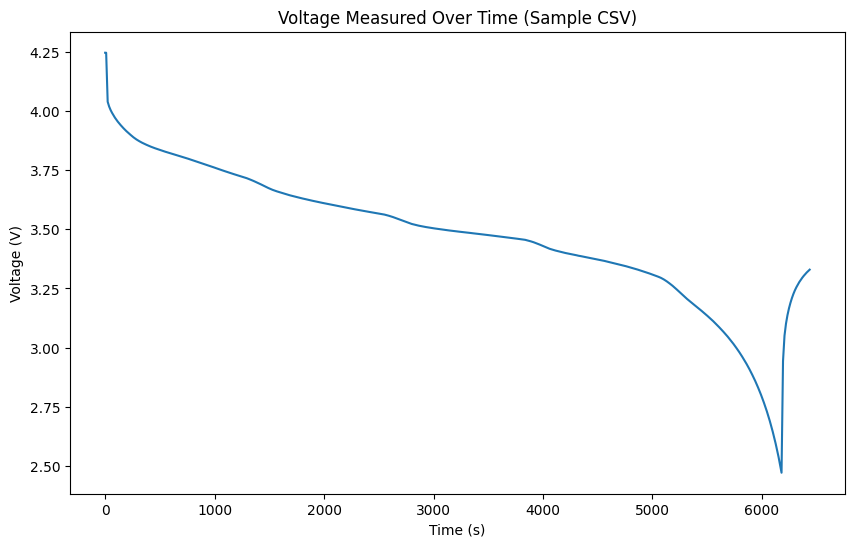

In [32]:
plt.figure(figsize=(10, 6))
sns.lineplot(x="Time", y="Voltage_measured", data=sample_data)
plt.title("Voltage Measured Over Time (Sample CSV)")
plt.xlabel("Time (s)")
plt.ylabel("Voltage (V)")
plt.show() # Step 6: Using Plotly for interactive plots

In [33]:
# Step 6: Using Plotly for interactive plots
fig = px.line(
    sample_data,
    x="Time",
    y="Voltage_measured",
    title="Voltage Measured Over Time (Interactive)"
)
fig.show()

In [34]:
# Step 7: Check for missing values
print("Metadata Missing Values:")
print(metadata.isnull().sum())

Metadata Missing Values:
type                      0
start_time                0
ambient_temperature       0
battery_id                0
test_id                   0
uid                       0
filename                  0
Capacity               4771
Re                     5609
Rct                    5609
dtype: int64


In [35]:
print("Sample Data Missing Values:")
print(sample_data.isnull().sum())

Sample Data Missing Values:
Voltage_measured        0
Current_measured        0
Temperature_measured    0
Current_load            0
Voltage_load            0
Time                    0
dtype: int64


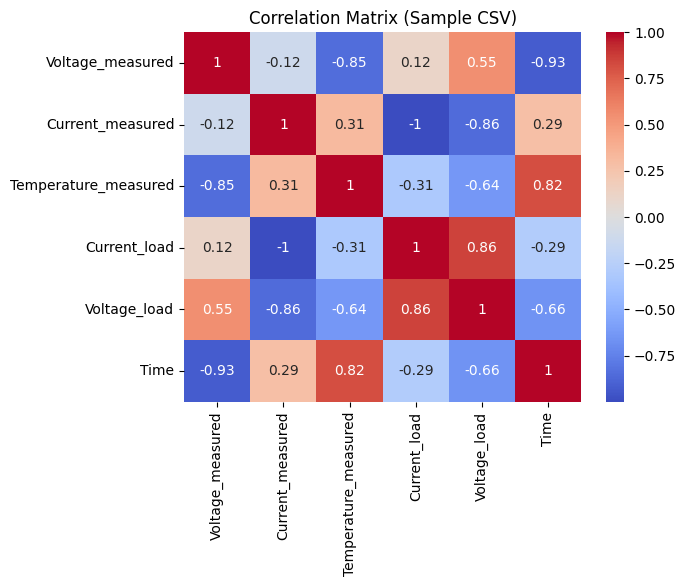

In [36]:
# Step 8: Correlation analysis in sample data
correlation_matrix = sample_data.corr()
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm")
plt.title("Correlation Matrix (Sample CSV)")
plt.show()

In [ ]:
# Step 9: Combine metadata with CSV data (Example)
merged_data = sample_data.copy()
for col in ["type", "start_time", "ambient_temperature", "battery_id", "test_id", "uid", "Capacity", "Re", "Rct"]:
    merged_data[col] = metadata.loc[metadata["filename"] == os.path.basename(sample_file), col].values[0]

In [38]:
print("Merged Data:")
print(merged_data.head())

Merged Data:
   Voltage_measured  Current_measured  Temperature_measured  Current_load  \
0          4.246711          0.000252              6.212696        0.0002   
1          4.246764         -0.001411              6.234019        0.0002   
2          4.039277         -0.995093              6.250255        1.0000   
3          4.019506         -0.996731              6.302176        1.0000   
4          4.004763         -0.992845              6.361645        1.0000   

   Voltage_load    Time       type  \
0         0.000   0.000  discharge   
1         4.262   9.360  discharge   
2         3.465  23.281  discharge   
3         3.451  36.406  discharge   
4         3.438  49.625  discharge   

                                          start_time  ambient_temperature  \
0  [2010.       7.      21.      15.       0.    ...                    4   
1  [2010.       7.      21.      15.       0.    ...                    4   
2  [2010.       7.      21.      15.       0.    ...            

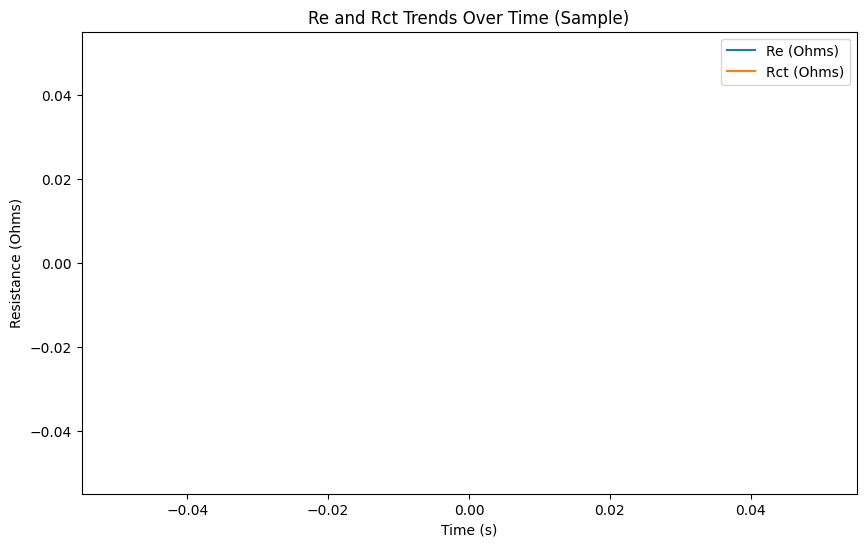

In [39]:
# Step 10: Insights
plt.figure(figsize=(10, 6))
sns.lineplot(x="Time", y="Re", data=merged_data, label="Re (Ohms)")
sns.lineplot(x="Time", y="Rct", data=merged_data, label="Rct (Ohms)")
plt.title("Re and Rct Trends Over Time (Sample)")
plt.xlabel("Time (s)")
plt.ylabel("Resistance (Ohms)")
plt.legend()
plt.show()